In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as  plt

In [2]:
path ='C:/Users/HP/Data Analytics Real-World Projects in Python/5-Sales Data Analysis-20210703T075454Z-001/5-Sales Data Analysis/Sales_Data'
files = [file for file in os.listdir(path)]

In [3]:
for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [4]:
alldata_df = pd.DataFrame()
for file in files:
    current_df = pd.read_csv(path+'/' + file)
    alldata_df = pd.concat([alldata_df,current_df])

In [5]:
alldata_df.shape

(186850, 6)

In [6]:
alldata_df.to_csv(path + '/' +'all_data_byme.csv', index = False)

In [7]:
alldata_df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [8]:
alldata_df.dropna(axis =0 ,how='all',inplace=True)

In [9]:
alldata_df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [10]:
alldata_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### What are the sales in different months?

In [11]:
'04/19/19 08:46'.split('/')[0]

'04'

In [12]:
def month(y):
    return y.split('/')[0]

In [13]:
alldata_df['month'] = alldata_df['Order Date'].apply(month)

In [14]:
alldata_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [15]:
alldata_df.dtypes
# Here object means string datatype

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
month               object
dtype: object

In [16]:
alldata_df['month'] = alldata_df['month'].astype(int)

ValueError: invalid literal for int() with base 10: 'Order Date'

In [17]:
alldata_df['month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [18]:
filter = alldata_df['month'] == 'Order Date'
alldata_df = alldata_df[~filter]

In [19]:
alldata_df.shape

(185950, 7)

In [20]:
alldata_df['month'] = alldata_df['month'].astype(int)

In [21]:
alldata_df['Quantity Ordered'] = alldata_df['Quantity Ordered'].astype(int)
alldata_df['Price Each'] = alldata_df['Price Each'].astype(float)

In [22]:
alldata_df['Sales']=alldata_df['Quantity Ordered']*alldata_df['Price Each']

In [23]:
alldata_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [24]:
alldata_df.groupby('month')['Sales'].sum()

month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Sales, dtype: float64

Text(0, 0.5, 'Sales in US $')

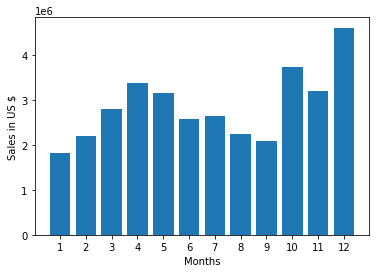

In [25]:
month= range(1,13)
plt.bar(month,alldata_df.groupby('month')['Sales'].sum())
plt.xticks(month)
plt.xlabel("Months")
plt.ylabel("Sales in US $")

#### Which city has maximum orders?

In [26]:
#alldata_df['Purchase Address']
'917 1st St, Dallas, TX 75001'.split(',')[1]


' Dallas'

In [27]:
def city(x):
    return x.split(',')[1]

In [28]:
alldata_df['city'] = alldata_df['Purchase Address'].apply(city)

In [29]:
alldata_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [30]:
alldata_df.groupby('city')['Quantity Ordered'].sum()

city
 Atlanta          16602
 Austin           11153
 Boston           22528
 Dallas           16730
 Los Angeles      33289
 New York City    27932
 Portland         14053
 San Francisco    50239
 Seattle          16553
Name: Quantity Ordered, dtype: int32

Text(0, 0.5, 'Quantities Ordered')

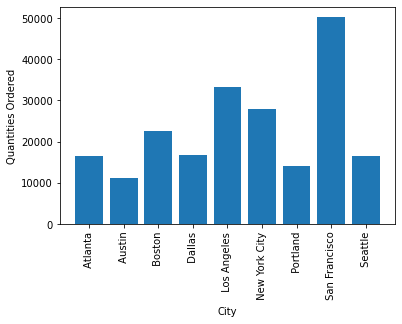

In [31]:

plt.bar(alldata_df.groupby('city')['Quantity Ordered'].sum().index,alldata_df.groupby('city')['Quantity Ordered'].sum())
plt.xticks(rotation = 'vertical')
plt.xlabel("City")
plt.ylabel("Quantities Ordered")

#### What time should we display advertisements to maximise for product purchase?

In [32]:
alldata_df['Hour'] = pd.to_datetime(alldata_df['Order Date']).dt.hour

In [33]:
alldata_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9


In [34]:
keys = []
hour =[]
for key,hour_df in alldata_df.groupby('Hour'):
    keys.append(key)
    hour.append(len(hour_df))

Text(0, 0.5, 'Quantity Ordered')

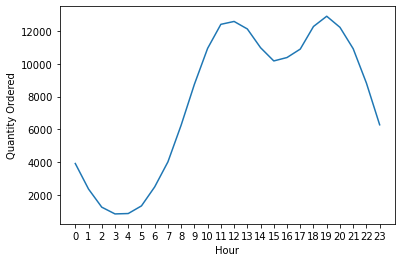

In [35]:
plt.plot(keys,hour)
plt.xlabel("Hour")
plt.xticks(keys)
plt.ylabel("Quantity Ordered")

Around 11 to 8 pm is the best time.

#### What product sold the most? & Why?

<AxesSubplot:xlabel='Product'>

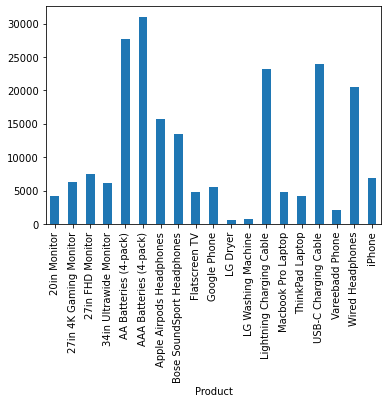

In [36]:
alldata_df.groupby('Product')['Quantity Ordered'].sum().plot.bar()

In [37]:
alldata_df.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [38]:
product = alldata_df.groupby('Product')['Quantity Ordered'].sum().index
Quantity = alldata_df.groupby('Product')['Quantity Ordered'].sum()
prices = alldata_df.groupby('Product')['Price Each'].mean()

In [39]:
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

<ipython-input-40-ecd6bea587f0>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product, rotation ='vertical', size =8)


[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

<Figure size 2880x1728 with 0 Axes>

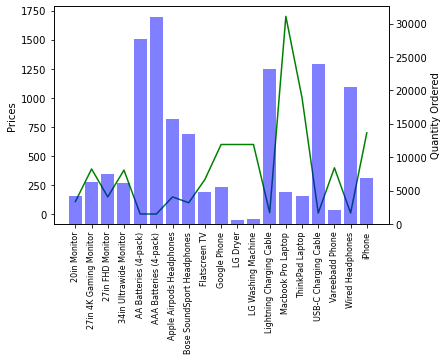

In [40]:
plt.figure(figsize = (40,24))
fig,ax1 =plt.subplots()
ax2 = ax1.twinx() # Secondary y axis 
ax1.plot(product,prices , 'g')
ax2.set_ylabel('Quantity Ordered')
ax1.set_ylabel('Prices')
ax2.bar(product,Quantity , ls ='--' ,color = 'b', alpha = 0.5)
ax1.set_xticklabels(product, rotation ='vertical', size =8)

Cheaper the product higher wwill be the sales volume.

#### What products are most often sold together?

In [41]:
alldata_df.shape

(185950, 10)

In [42]:
small_df = alldata_df[alldata_df.duplicated(subset = ['Order ID'],keep = False)]

In [43]:
small_df.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city,Hour
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,17
33,176586,Google Phone,1,600.00,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco,17
119,176672,Lightning Charging Cable,1,14.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4,14.95,New York City,11
120,176672,USB-C Charging Cable,1,11.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4,11.95,New York City,11


In [44]:
alldata_df.duplicated(subset = ['Order ID'],keep = False)

0        False
2        False
3         True
4         True
5        False
         ...  
11681    False
11682    False
11683    False
11684    False
11685    False
Length: 185950, dtype: bool

In [46]:
small_df['Grouped'] = small_df.groupby('Order ID')['Product'].transform(lambda x : (',').join(x))

<ipython-input-46-bfd82bca853e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_df['Grouped'] = small_df.groupby('Order ID')['Product'].transform(lambda x : (',').join(x))


In [47]:
small_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city,Hour,Grouped
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."
...,...,...,...,...,...,...,...,...,...,...,...
11628,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta,20,"34in Ultrawide Monitor,AA Batteries (4-pack)"
11639,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta,0,"Wired Headphones,AAA Batteries (4-pack)"
11640,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta,0,"Wired Headphones,AAA Batteries (4-pack)"
11677,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco,13,"Google Phone,USB-C Charging Cable"


#### Lets drop all the duplicate values

In [50]:
small_df = small_df[small_df.duplicated(subset = ['Order ID'])]

In [52]:
small_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city,Hour,Grouped
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,"Google Phone,Wired Headphones"
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19,"Google Phone,USB-C Charging Cable"
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."
33,176586,Google Phone,1,600.00,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco,17,"AAA Batteries (4-pack),Google Phone"
120,176672,USB-C Charging Cable,1,11.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4,11.95,New York City,11,"Lightning Charging Cable,USB-C Charging Cable"


<AxesSubplot:ylabel='Grouped'>

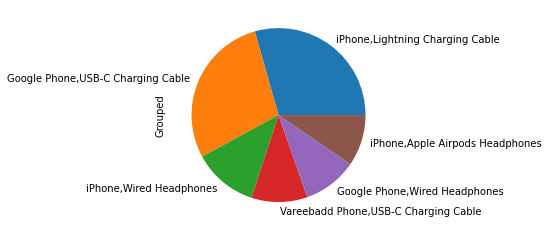

In [59]:
small_df['Grouped'].value_counts()[:6].plot.pie()

In [65]:
# Plotly
import plotly.express as px

fig = px.pie(small_df, values=small_df['Grouped'].value_counts()[:5], 
             names=small_df['Grouped'][:5].value_counts().index , 
             title='What all products are frequently bought together')
fig.show()